In [1]:
from absbox import API,save,init_jupyter
from absbox.local.china import 信贷ABS,show
from absbox.local.util import *
import pickle,os
import numpy as np
import pandas as pd 
localAPI = API("http://localhost:8081")
remoteAPI = API("https://deal-bench.xyz/api")
init_jupyter()

In [2]:
#调整后的资产池余额 = 未偿还贷款本金总额 - 收益补充超额担保金额
#调整后的资产池余额 - 目标超额担保金额

In [2]:
# 合格投资 暂时不参与分配 

test01 = 信贷ABS(
    "速利银丰中国 2021 年第一期个人汽车抵押贷款支持证券信托"
    ,{"封包日":"2022-10-31","起息日":"2022-10-26","首次兑付日":"2022-11-26"
      ,"法定到期日":"2060-12-01","收款频率":"月末","付款频率":["每月",26]}
    ,{'归集表':[ ["2022-09-30",4784936786,528909185.2,21282112.96]
                ,["2022-10-31",4304247306,480689479.9,18307777.31]
                ,["2022-11-30",3850419452,453827854.6,16502702.18]
                ,["2022-12-31",3421607632,428811820.1,14778431.28]
                ,["2023-01-31",3013633943,407973688.6,13149122.92]
                ,["2023-02-28",2647016507,366617436,11605251.78]
                ,["2023-03-31",2286770183,360246324.2,10235285.46]
                ,["2023-04-30",1954800819,331969363.6,8884510.74]
                ,["2023-05-31",1655566418,299234401.5,7637610.86]
                ,["2023-06-30",1393137673,262428744.6,6507730.19]
                ,["2023-07-31",1169116006,224021666.9,5509034.69]
                ,["2023-08-31",980306104,188809902.3,4653045.26]
                ,["2023-09-30",824222559.1,156083544.9,3925579.64]
                ,["2023-10-31",686655031.1,137567528,3316188.66]
                ,["2023-11-30",565956744.6,120698286.5,2770883.69]
                ,["2023-12-31",460002546,105954198.6,2289704.73]
                ,["2024-01-31",362450149.3,97552396.74,1866080.6]
                ,["2024-02-29",285011170.4,77438978.89,1475630.61]
                ,["2024-03-31",214157901.8,70853268.62,1166109.85]
                ,["2024-04-30",156686922.8,57470979,882526.69]
                ,["2024-05-31",111572058.4,45114864.34,651349.9]
                ,["2024-06-30",76450517.84,35121540.6,469113.96]
                ,["2024-07-31",49698861.84,26751656,325848.02]
                ,["2024-08-31",28896808.19,20802053.65,215172.23]
                ,["2024-09-30",13614661.42,15282146.77,127369.68]
                ,["2024-10-31",4857897.29,8756764.13,60661.17]
                ,["2024-11-30",1399804.87,3458092.42,21215.87]
                ,["2024-12-31",496096.76,903708.11,5916.37]
                ,["2025-01-31",94830.28,401266.48,2102.58]
                ,["2025-02-28",58960.9,35869.38,447.78]
                ,["2025-03-31",38119.22,20841.68,277.46]
                ,["2025-04-30",17178,20941.22,177.92]
                ,["2025-05-31",2537.35,14640.65,77.47]
                ,["2025-06-30",0,2537.35,8.41]]
      ,'发行':{'资产池规模':9_179_540_189.72},
     }
    ,(("一般准备金账户",{"余额":89_922_387.64
                      ,"类型":{"较低":[
                                 {"分段":
                                   [[("债券余额","A","次级"),">",0]
                                    ,{"目标储备金额":{"公式":("自定义","资产池调整后余额"),"系数":0.01}}
                                    ,{"固定储备金额":0}]}
                                ,{"目标储备金额":["债券余额",1.0]}]}
                      ,"计息":{"周期":"季度末","利率":0.04,"最近结息日":"2022-09-30"}})
      ,("经营账户",{"余额":0.0})
      ,("混合准备金账户",{"余额":0.0})
      ,("持续购买准备金账户",{"余额":0.0})
      ,("费用账户",{"余额":0.0})
     )
    ,(("A",{"当前余额":3_649_536_000.00
             ,"当前利率":0.0348
             ,"初始余额":7_920_000_000
             ,"初始利率":0.0348
             ,"起息日":"2022-10-26"
             ,"利率":{"固定":0.0348}
             ,"债券类型":{"过手摊还":None}})
      ,("次级",{"当前余额":416_842_105.26
             ,"当前利率":0.0
             ,"初始余额":416_842_105.26
             ,"初始利率":0.07
             ,"起息日":"2022-10-26"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,(("增值税",{"类型":{"百分比费率":["资产池回款","利息",0.0326]}})
      ,("代理支付费用利息",{"类型": {"百分比费率":["已付利息合计","A",0.0002]}})
      ,("代理支付费用本金",{"类型": {"百分比费率":["已付本金合计","A",0.0002]}})
      ,("贷款服务费用",{"类型": {"年化费率":["资产池余额",0.005]},"计算日":"2022-09-29"})
     )
    ,{"未违约":[
        ["流动性支持","发起人","一般准备金账户",("储备账户缺口","一般准备金账户")] 
        ,["账户转移","费用账户","经营账户"]
        ,["支付费用",["经营账户"],['增值税']]
        ,["支付费用",["经营账户"],['贷款服务费用']]
         ,["支付利息","经营账户",["A"]]
         ,["计提费用","代理支付费用利息"]
         ,["支付费用",["经营账户"],['代理支付费用利息']]
         ,["储备账户转移","经营账户","一般准备金账户","目标储备"]
         ,["支付本金","经营账户","A"
           ,{"公式":("Min"
                      ,("债券余额","A")
                      ,("差额"
                        ,("债券余额","A","次级")
                        ,("Max"
                          ,("差额",("自定义","资产池调整后余额"),("自定义","目标超额担保金额"))
                          ,("常数",0.0))))}]
         ,["计提费用","代理支付费用本金"]
         ,["支付费用",["经营账户"],['代理支付费用本金']]    
         ,["支付利息","经营账户",["次级"]]
         ,[[("债券余额","A"),"=",0]
          ,["支付本金","经营账户",["次级"]]]
         ,["流动性支持报酬","经营账户","发起人"]
         ]
     ,"回款后":[["计提费用","增值税","贷款服务费用"]]
     ,"清仓回购":[["出售资产",["正常|违约",1.0,0.0],"经营账户"]
                ,["账户转移", "一般准备金账户", "经营账户" ]
                ,["支付剩余本金","经营账户",["A"]]
                ,["支付本金","经营账户",["次级"]]
                ,["支付收益","经营账户","次级"]] 
     }
    ,(["利息回款","经营账户"]
      ,["本金回款","经营账户"]
      ,["早偿回款","经营账户"]
      ,["回收回款","经营账户"])
    ,None
    ,{"发起人":{"类型":"无限制"}}
    ,{"收益补充超额担保金额":
      {"余额曲线":[("2022-10-01",63322258.41)
                  ,("2022-11-01",50234030.96)
                  ,("2022-12-01",38881437.99)
                  ,("2023-01-01",29197182.73)
                  ,("2023-02-01",21089455.64)
                  ,("2023-03-01",14475798.7)
                  ,("2023-04-01",9227206.729)
                  ,("2023-05-01",5329504.123)
                  ,("2023-06-01",2671007.271)
                  ,("2023-07-01",1063561.6)
                  ,("2023-08-01",262786.9647)
                  ,("2023-09-01",0)]}
     ,"资产池调整后余额":{"公式":("差额",("资产池余额",),("自定义","收益补充超额担保金额"))}
     ,"目标超额担保金额":{"常量":655_396_658.24} 
     }
)
#


myAssumption = [{"CPR":0.00}
                ,{"CDR":0.0005}
                ,{"回收":(0.7,6)}
                ,{"清仓":[{"债券余额剩余比率":0.10}]}]


r = localAPI.run(test01
             ,assumptions=myAssumption
             ,read=True)
#r['pool']['flow']

In [10]:
416842105.26/(7920000000.00+416842105.26)

0.04999999999964015

In [54]:
(416_842_105 + 4_169_880_000 ) - (4_304_247_306.0 - 655_396_658)

937871457.0

In [17]:
491_680_548.16 + 34_166_305.94 + 3_062_331.06

528909185.16

In [3]:
r['pool']['flow']

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率
日期,,,,,,,,
2022-10-31,"4,303,881,664.01","480,648,645.74","18,306,222.08",0,"203,233.81",0.0,0.0,0
2022-11-30,"3,849,934,102.42","453,770,649.15","16,500,621.99",0,"176,912.44",0.0,0.0,0
2022-12-31,"3,421,031,018.4","428,739,556.26","14,775,940.8",0,"163,527.76",0.0,0.0,0
2023-01-31,"3,012,998,098.03","407,887,610.47","13,146,348.59",0,"145,309.9",0.0,0.0,0
2023-02-28,"2,646,356,483.02","366,526,021.28","11,602,358.05",0,"115,593.73",0.0,0.0,0
2023-03-31,"2,286,102,877.51","360,141,200.28","10,232,298.68",0,"112,405.23","157,995.67","67,712.43",0
2023-04-30,"1,954,150,057.03","331,858,849.49","8,881,553.04",0,"93,970.99","142,263.66","60,970.14",0
2023-05-31,"1,654,944,974.48","299,122,079.11","7,634,743.96",0,"83,003.44","123,838.7","53,073.73",0
2023-06-30,"1,392,557,492.81","262,319,454.63","6,505,020.0",0,"68,027.04","114,469.43","49,058.32",0


In [35]:
accView(r,flow=["余额"],flowName=False)

,一般准备金账户,持续购买准备金账户,混合准备金账户,经营账户,费用账户
日期,,,,,
2022-09-30,"89,922,387.64",NaN,NaN,NaN,NaN
2022-10-31,NaN,NaN,NaN,"498,997,257.21",NaN
2022-11-26,"89,922,387.64",NaN,NaN,0.0,0.0
2022-11-30,NaN,NaN,NaN,"470,330,556.78",NaN
2022-12-26,"89,922,387.64",NaN,NaN,0.0,0.0
2022-12-31,"90,829,002.39",NaN,NaN,"443,590,251.38",NaN
2023-01-26,"90,829,002.39",NaN,NaN,0.0,0.0
2023-01-31,NaN,NaN,NaN,"421,122,811.52",NaN
2023-02-26,"90,829,002.39",NaN,NaN,0.0,0.0


In [9]:
r['bonds']['次级']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2023-07-26,0,"749,099,805.41","416,842,105.26",0,"1,165,941,910.67","[<PayPrin:[""\27425\32423""],Just 0.00>, <PayYield:次级>]"


In [7]:
r['bonds']['A']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2022-11-26,"3,181,774,511.64","10,786,628.59","467,761,488.36",0.0348,"478,548,116.95","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 3181774511.64>]"
2022-12-26,"2,739,299,250.01","9,100,746.82","442,475,261.63",0.0348,"451,576,008.45","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 2739299250.01>]"
2023-01-26,"2,320,171,685.17","8,096,317.89","419,127,564.84",0.0348,"427,223,882.73","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 2320171685.17>]"
2023-02-26,"1,920,305,723.66","6,857,537.57","399,865,961.51",0.0348,"406,723,499.08","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 1920305723.66>]"
2023-03-26,"1,560,301,944.6","5,126,427.11","360,003,779.06",0.0348,"365,130,206.17","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 1560301944.60>]"
2023-04-26,"1,205,304,212.38","4,611,654.07","354,997,732.22",0.0348,"359,609,386.29","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 1205304212.38>]"
2023-05-26,"877,232,551.38","3,447,500.26","328,071,661.0",0.0348,"331,519,161.26","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 877232551.38>]"
2023-06-26,"580,656,646.73","2,592,762.94","296,575,904.65",0.0348,"299,168,667.59","[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 580656646.73>]"
2023-07-26,0.0,"1,660,837.09","580,656,646.73",0.0348,"582,317,483.82","[[<PayInt:[""A""],Just 0.00>, <PayPrin:[""A""],Just 319835347.80>], <PayPrin:[""A""],Just 0.00>]"


In [3]:
bondView(r)

A                                                   \
                         余额            利息             本金 执行利率           本息合计   
日期                                                                             
2022-11-26 3,181,774,511.64 10,786,628.59 467,761,488.36 0.03 478,548,116.95   
2022-12-26 2,739,299,250.01  9,100,746.82 442,475,261.63 0.03 451,576,008.45   
2023-01-26 2,320,171,685.17  8,096,317.89 419,127,564.84 0.03 427,223,882.73   
2023-02-26 1,920,305,723.66  6,857,537.57 399,865,961.51 0.03 406,723,499.08   
2023-03-26  1,560,301,944.6  5,126,427.11 360,003,779.06 0.03 365,130,206.17   
2023-04-26 1,205,304,212.38  4,611,654.07 354,997,732.22 0.03 359,609,386.29   
2023-05-26   877,232,551.38  3,447,500.26  328,071,661.0 0.03 331,519,161.26   
2023-06-26   580,656,646.73  2,592,762.94 296,575,904.65 0.03 299,168,667.59   
2023-07-26              0.0  1,660,837.09 580,656,646.73 0.03 582,317,483.82   

                                                                                                        \
                                                                                                    备注   
日期                                                                                                       
2022-11-26                              [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 3181774511.64>]   
2022-12-26                              [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 2739299250.01>]   
2023-01-26                              [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 2320171685.17>]   
2023-02-26                              [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 1920305723.66>]   
2023-03-26                              [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 1560301944.60>]   
2023-04-26                              [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 1205304212.38>]   
2023-05-26                               [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 877232551.38>]   
2023-06-26                               [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 580656646.73>]   
2023-07-26  [[<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 319835347.80>], <PayPrin:["A"],Just 0.00>]   

                       次级                                                      \
                       余额             利息             本金 执行利率             本息合计   
日期                                                                              
2022-11-26 416,842,105.26            NaN            NaN  NaN              NaN   
2022-12-26 416,842,105.26            NaN            NaN  NaN              NaN   
2023-01-26 416,842,105.26            NaN            NaN  NaN              NaN   
2023-02-26 416,842,105.26            NaN            NaN  NaN              NaN   
2023-03-26 416,842,105.26            NaN            NaN  NaN              NaN   
2023-04-26 416,842,105.26            NaN            NaN  NaN              NaN   
2023-05-26 416,842,105.26            NaN            NaN  NaN              NaN   
2023-06-26 416,842,105.26            NaN            NaN  NaN              NaN   
2023-07-26            0.0 749,099,805.41 416,842,105.26  0.0 1,165,941,910.67   

                                                                   
                                                               备注  
日期                                                                 
2022-11-26                                                    NaN  
2022-12-26                                                    NaN  
2023-01-26                                                    NaN  
2023-02-26                                                    NaN  
2023-03-26                                                    NaN  
2023-04-26                                                    NaN  
2023-05-26                                                    NaN  
2023-06-26                                                    NaN  
2023-07-26  [<PayPrin:["\27425\32423"],Just 0.00>, <PayYield:次级>]

In [4]:
bondView(r,flow=["余额"])

,A,次级
,余额,余额
日期,,
2022-11-26,"3,181,774,511.64","416,842,105.26"
2022-12-26,"2,739,299,250.01","416,842,105.26"
2023-01-26,"2,320,171,685.17","416,842,105.26"
2023-02-26,"1,920,305,723.66","416,842,105.26"
2023-03-26,"1,560,301,944.6","416,842,105.26"
2023-04-26,"1,205,304,212.38","416,842,105.26"
2023-05-26,"877,232,551.38","416,842,105.26"
2023-06-26,"580,656,646.73","416,842,105.26"


In [8]:
r['accounts']['一般准备金账户']

,余额,变动额,备注
日期,,,
2022-09-30,"89,922,387.64",0.0,<BankInterest:>
2022-11-26,"89,922,387.64",0.0,<Support:发起人>
2022-12-26,"89,922,387.64",0.0,<Support:发起人>
2022-12-31,"90,829,002.39","906,614.75",<BankInterest:>
2023-01-26,"90,829,002.39",0.0,<Support:发起人>
2023-02-26,"90,829,002.39",0.0,<Support:发起人>
2023-03-26,"90,829,002.39",0.0,<Support:发起人>
2023-03-31,"91,724,850.08","895,847.69",<BankInterest:>
2023-04-26,"91,724,850.08",0.0,<Support:发起人>


In [9]:
r['accounts']['经营账户']

,余额,变动额,备注
日期,,,
2022-10-31,"18,307,777.31","18,307,777.31",<PoolInflow:CollectedInterest>
2022-10-31,"498,997,257.21","480,689,479.9",<PoolInflow:CollectedPrincipal>
2022-10-31,"498,997,257.21",0.0,<PoolInflow:CollectedPrepayment>
2022-10-31,"498,997,257.21",0.0,<PoolInflow:CollectedRecoveries>
2022-11-26,"498,997,257.21",0.0,"<Transfer:费用账户,经营账户>"
2022-11-26,"498,400,423.67","-596,833.54","<SeqPayFee:[""\22686\20540\31246""]>"
2022-11-26,"496,302,917.14","-2,097,506.53","<SeqPayFee:[""\36151\27454\26381\21153\36153\29992""]>"
2022-11-26,"485,516,288.55","-10,786,628.59","<PayInt:[""A""],Nothing>"
2022-11-26,"485,514,131.23","-2,157.32","<SeqPayFee:[""\20195\29702\25903\20184\36153\29992\21033\24687""]>"


In [4]:
balanceSheetView(r)

资产                                            \
                       未偿余额         不良           资产池-合计       一般准备金账户   
日期                                                                      
2022-11-26 4,303,881,664.01 203,233.81 4,304,084,897.82 89,922,387.64   
2022-12-26 3,849,934,102.42 380,146.25 3,850,314,248.67 89,922,387.64   
2023-01-26  3,421,031,018.4 543,674.01 3,421,574,692.41 90,829,002.39   
2023-02-26 3,012,998,098.03 688,983.91 3,013,687,081.94 90,829,002.39   
2023-03-26 2,646,356,483.02 804,577.64 2,647,161,060.66 90,829,002.39   
2023-04-26 2,286,102,877.51  758,987.2 2,286,861,864.71 91,724,850.08   
2023-05-26 1,954,150,057.03 710,694.53 1,954,860,751.56 91,724,850.08   
2023-06-26 1,654,944,974.48 669,859.27 1,655,614,833.75 91,724,850.08   
2023-07-26 1,392,557,492.81 623,416.88 1,393,180,909.69           0.0   

                                                                   负债  \
           持续购买准备金账户 混合准备金账户 经营账户 费用账户         账户-合计                A   
日期                                                                      
2022-11-26      None    None  0.0  0.0 89,922,387.64 3,181,408,869.55   
2022-12-26      None    None  0.0  0.0 89,922,387.64 2,738,813,900.93   
2023-01-26      None    None  0.0  0.0 90,829,002.39 2,319,595,072.17   
2023-02-26      None    None  0.0  0.0 90,829,002.39 1,919,669,878.89   
2023-03-26      None    None  0.0  0.0 90,829,002.39 1,559,641,920.82   
2023-04-26      None    None  0.0  0.0 91,724,850.08 1,204,636,907.29   
2023-05-26      None    None  0.0  0.0 91,724,850.08   876,581,789.41   
2023-06-26      None    None  0.0  0.0 91,724,850.08   580,035,203.71   
2023-07-26      None    None  0.0  0.0           0.0              0.0   

                                                         资产               负债  \
                       次级            债券-合计               合计               合计   
日期                                                                             
2022-11-26 416,842,105.26 3,598,250,974.81 4,394,007,285.46 3,598,250,974.81   
2022-12-26 416,842,105.26 3,155,656,006.19 3,940,236,636.31 3,155,656,006.19   
2023-01-26 416,842,105.26 2,736,437,177.43  3,512,403,694.8 2,736,437,177.43   
2023-02-26 416,842,105.26 2,336,511,984.15 3,104,516,084.33 2,336,511,984.15   
2023-03-26 416,842,105.26 1,976,484,026.08 2,737,990,063.05 1,976,484,026.08   
2023-04-26 416,842,105.26 1,621,479,012.55 2,378,586,714.79 1,621,479,012.55   
2023-05-26 416,842,105.26 1,293,423,894.67 2,046,585,601.64 1,293,423,894.67   
2023-06-26 416,842,105.26   996,877,308.97 1,747,339,683.83   996,877,308.97   
2023-07-26            0.0              0.0 1,393,180,909.69              0.0   

                         权益  
                         合计  
日期                           
2022-11-26   795,756,310.65  
2022-12-26   784,580,630.12  
2023-01-26   775,966,517.37  
2023-02-26   768,004,100.18  
2023-03-26   761,506,036.97  
2023-04-26   757,107,702.24  
2023-05-26   753,161,706.97  
2023-06-26   750,462,374.86  
2023-07-26 1,393,180,909.69

In [10]:
bs = balanceSheetView(r)

In [11]:
bs["资产负债比"]  = bs[("负债","A")]/bs[("资产","未偿余额")]

In [13]:
import matplotlib.pyplot as plt

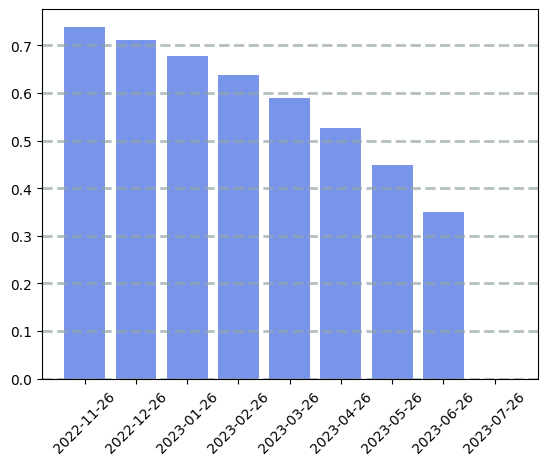

In [18]:
plt.bar(bs.index, bs["资产负债比"], color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [19]:
bs["速动比率"]  = bs[("资产","账户-合计")]/bs[("负债","A")]

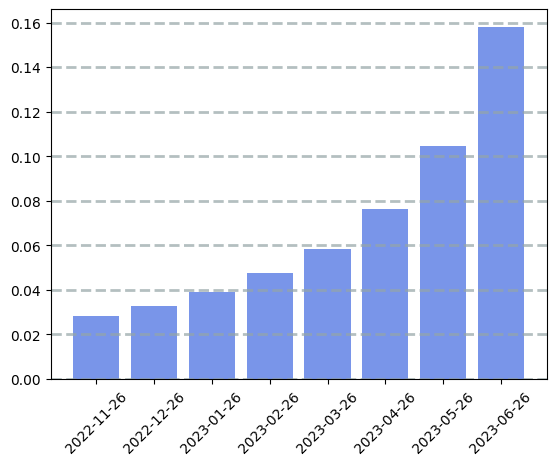

In [20]:
plt.bar(bs.index, bs["速动比率"], color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='日期'>

/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/I

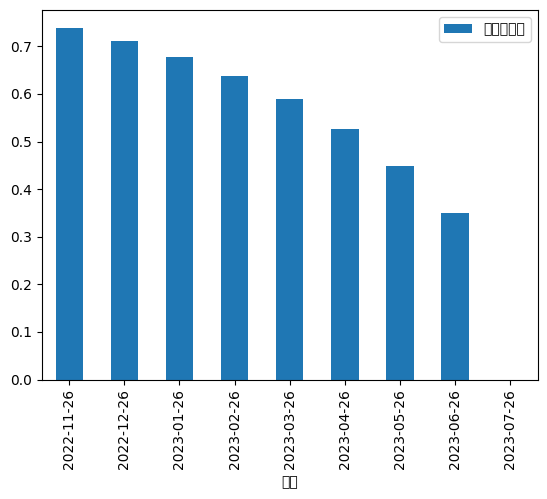

In [12]:
bs.plot(kind='bar',y="资产负债比")

In [22]:
bs[("资产","账户-合计")]/bs[("负债","A")]

日期
2022-11-26   0.028261709719225453
2022-12-26   0.032826785039886286
2023-01-26   0.039147535059822484
2023-02-26      0.047299240569301
2023-03-26   0.058212452214359695
2023-04-26    0.07610099519927804
2023-05-26    0.10456161246605017
2023-06-26    0.15796745046587093
2023-07-26    0.28964773971115143
2023-08-26     0.9588584343017453
2023-09-26                    inf
2023-10-26                    NaN
dtype: float64

In [10]:
bs[("负债","次级")]/bs[("资产","合计")]

日期
2022-11-26   0.09486254157499642
2022-12-26    0.1057883103235982
2023-01-26   0.11867604991074751
2023-02-26   0.13427188941193444
2023-03-26    0.1522518724525563
2023-04-26    0.1752545620372046
2023-05-26    0.2036828130513448
2023-06-26    0.2385647504765057
2023-07-26   0.28055491015473544
2023-08-26    0.3303667588596332
2023-09-26    0.2991267078190719
2023-10-26                   0.0
dtype: float64

In [14]:
r['pool']['flow']["违约金额"].cumsum() - r['pool']['flow']["回收金额"].cumsum() 

日期
2022-10-31          2,035,755.95
2022-11-30          3,807,187.51
2022-12-31          5,443,980.42
2023-01-31   6,897,868.609999999
2023-02-28   8,054,011.989999999
2023-03-31   7,594,634.319999999
2023-04-30          7,108,785.71
2023-05-31           6,698,037.7
2023-06-30   6,231,657.359999999
dtype: float64

In [12]:
r['pool']['flow']

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率
日期,,,,,,,,
2022-10-31,"4,300,584,034.04","480,280,373.21","18,292,195.87",0,"2,035,755.95",0.0,0.0,0
2022-11-30,"3,845,557,767.91","453,254,834.57","16,481,865.25",0,"1,771,431.56",0.0,0.0,0
2022-12-31,"3,415,832,874.38","428,088,100.62","14,753,489.24",0,"1,636,792.91",0.0,0.0,0
2023-01-31,"3,007,267,201.53","407,111,784.66","13,121,343.47",0,"1,453,888.19",0.0,0.0,0
2023-02-28,"2,640,408,803.21","365,702,254.94","11,576,281.78",0,"1,156,143.38",0.0,0.0,0
2023-03-31,"2,280,090,862.82","359,194,097.59","10,205,389.69",0,"1,123,842.8","1,583,220.47","678,523.06",0
2023-04-30,"1,948,288,292.83","330,863,389.44","8,854,911.5",0,"939,180.55","1,425,029.16","610,726.78",0
2023-05-31,"1,649,348,492.55","298,110,546.2","7,608,925.75",0,"829,254.08","1,240,002.09","531,429.46",0
2023-06-30,"1,387,333,684.71","261,335,433.15","6,480,618.16",0,"679,374.69","1,145,755.03","491,037.87",0


In [15]:
def buildPool(x):
    x['pool']["flow"]["不良"] = x['pool']['flow']["违约金额"].cumsum() - x['pool']['flow']["回收金额"].cumsum()
    return x

In [18]:
buildPool(r)['pool']['flow'].round(2)

,未偿余额,本金,利息,早偿金额,违约金额,回收金额,损失,利率,不良
日期,,,,,,,,,
2022-10-31,"4,300,584,034.04","480,280,373.21","18,292,195.87",0,"2,035,755.95",0.0,0.0,0,"2,035,755.95"
2022-11-30,"3,845,557,767.91","453,254,834.57","16,481,865.25",0,"1,771,431.56",0.0,0.0,0,"3,807,187.51"
2022-12-31,"3,415,832,874.38","428,088,100.62","14,753,489.24",0,"1,636,792.91",0.0,0.0,0,"5,443,980.42"
2023-01-31,"3,007,267,201.53","407,111,784.66","13,121,343.47",0,"1,453,888.19",0.0,0.0,0,"6,897,868.61"
2023-02-28,"2,640,408,803.21","365,702,254.94","11,576,281.78",0,"1,156,143.38",0.0,0.0,0,"8,054,011.99"
2023-03-31,"2,280,090,862.82","359,194,097.59","10,205,389.69",0,"1,123,842.8","1,583,220.47","678,523.06",0,"7,594,634.32"
2023-04-30,"1,948,288,292.83","330,863,389.44","8,854,911.5",0,"939,180.55","1,425,029.16","610,726.78",0,"7,108,785.71"
2023-05-31,"1,649,348,492.55","298,110,546.2","7,608,925.75",0,"829,254.08","1,240,002.09","531,429.46",0,"6,698,037.7"
2023-06-30,"1,387,333,684.71","261,335,433.15","6,480,618.16",0,"679,374.69","1,145,755.03","491,037.87",0,"6,231,657.36"


In [6]:
balanceSheetView(r)

资产                                            \
                       未偿余额         不良           资产池-合计       一般准备金账户   
日期                                                                      
2022-11-26 4,303,881,664.01 203,233.81 4,304,084,897.82 89,922,387.64   
2022-12-26 3,849,934,102.42 380,146.25 3,850,314,248.67 89,922,387.64   
2023-01-26  3,421,031,018.4 543,674.01 3,421,574,692.41 90,829,002.39   
2023-02-26 3,012,998,098.03 688,983.91 3,013,687,081.94 90,829,002.39   
2023-03-26 2,646,356,483.02 804,577.64 2,647,161,060.66 90,829,002.39   
2023-04-26 2,286,102,877.51  758,987.2 2,286,861,864.71 91,724,850.08   
2023-05-26 1,954,150,057.03 710,694.53 1,954,860,751.56 91,724,850.08   
2023-06-26 1,654,944,974.48 669,859.27 1,655,614,833.75 91,724,850.08   
2023-07-26 1,392,557,492.81 623,416.88 1,393,180,909.69           0.0   

                                                                   负债  \
           持续购买准备金账户 混合准备金账户 经营账户 费用账户         账户-合计                A   
日期                                                                      
2022-11-26      None    None  0.0  0.0 89,922,387.64 3,181,408,869.55   
2022-12-26      None    None  0.0  0.0 89,922,387.64 2,738,813,900.93   
2023-01-26      None    None  0.0  0.0 90,829,002.39 2,319,595,072.17   
2023-02-26      None    None  0.0  0.0 90,829,002.39 1,919,669,878.89   
2023-03-26      None    None  0.0  0.0 90,829,002.39 1,559,641,920.82   
2023-04-26      None    None  0.0  0.0 91,724,850.08 1,204,636,907.29   
2023-05-26      None    None  0.0  0.0 91,724,850.08   876,581,789.41   
2023-06-26      None    None  0.0  0.0 91,724,850.08   580,035,203.71   
2023-07-26      None    None  0.0  0.0           0.0              0.0   

                                                         资产               负债  \
                       次级            债券-合计               合计               合计   
日期                                                                             
2022-11-26 416,842,105.26 3,598,250,974.81 4,394,007,285.46 3,598,250,974.81   
2022-12-26 416,842,105.26 3,155,656,006.19 3,940,236,636.31 3,155,656,006.19   
2023-01-26 416,842,105.26 2,736,437,177.43  3,512,403,694.8 2,736,437,177.43   
2023-02-26 416,842,105.26 2,336,511,984.15 3,104,516,084.33 2,336,511,984.15   
2023-03-26 416,842,105.26 1,976,484,026.08 2,737,990,063.05 1,976,484,026.08   
2023-04-26 416,842,105.26 1,621,479,012.55 2,378,586,714.79 1,621,479,012.55   
2023-05-26 416,842,105.26 1,293,423,894.67 2,046,585,601.64 1,293,423,894.67   
2023-06-26 416,842,105.26   996,877,308.97 1,747,339,683.83   996,877,308.97   
2023-07-26            0.0              0.0 1,393,180,909.69              0.0   

                         权益  
                         合计  
日期                           
2022-11-26   795,756,310.65  
2022-12-26   784,580,630.12  
2023-01-26   775,966,517.37  
2023-02-26   768,004,100.18  
2023-03-26   761,506,036.97  
2023-04-26   757,107,702.24  
2023-05-26   753,161,706.97  
2023-06-26   750,462,374.86  
2023-07-26 1,393,180,909.69

In [5]:
balanceSheetView(r,equity=["次级"])

资产                                            \
                       未偿余额         不良           资产池-合计       一般准备金账户   
日期                                                                      
2022-11-26 4,303,881,664.01 203,233.81 4,304,084,897.82 89,922,387.64   
2022-12-26 3,849,934,102.42 380,146.25 3,850,314,248.67 89,922,387.64   
2023-01-26  3,421,031,018.4 543,674.01 3,421,574,692.41 90,829,002.39   
2023-02-26 3,012,998,098.03 688,983.91 3,013,687,081.94 90,829,002.39   
2023-03-26 2,646,356,483.02 804,577.64 2,647,161,060.66 90,829,002.39   
2023-04-26 2,286,102,877.51  758,987.2 2,286,861,864.71 91,724,850.08   
2023-05-26 1,954,150,057.03 710,694.53 1,954,860,751.56 91,724,850.08   
2023-06-26 1,654,944,974.48 669,859.27 1,655,614,833.75 91,724,850.08   
2023-07-26 1,392,557,492.81 623,416.88 1,393,180,909.69           0.0   

                                                                   负债  \
           持续购买准备金账户 混合准备金账户 经营账户 费用账户         账户-合计                A   
日期                                                                      
2022-11-26      None    None  0.0  0.0 89,922,387.64 3,181,408,869.55   
2022-12-26      None    None  0.0  0.0 89,922,387.64 2,738,813,900.93   
2023-01-26      None    None  0.0  0.0 90,829,002.39 2,319,595,072.17   
2023-02-26      None    None  0.0  0.0 90,829,002.39 1,919,669,878.89   
2023-03-26      None    None  0.0  0.0 90,829,002.39 1,559,641,920.82   
2023-04-26      None    None  0.0  0.0 91,724,850.08 1,204,636,907.29   
2023-05-26      None    None  0.0  0.0 91,724,850.08   876,581,789.41   
2023-06-26      None    None  0.0  0.0 91,724,850.08   580,035,203.71   
2023-07-26      None    None  0.0  0.0           0.0              0.0   

                                          资产               负债  \
                      债券-合计               合计               合计   
日期                                                              
2022-11-26 3,181,408,869.55 4,394,007,285.46 3,181,408,869.55   
2022-12-26 2,738,813,900.93 3,940,236,636.31 2,738,813,900.93   
2023-01-26 2,319,595,072.17  3,512,403,694.8 2,319,595,072.17   
2023-02-26 1,919,669,878.89 3,104,516,084.33 1,919,669,878.89   
2023-03-26 1,559,641,920.82 2,737,990,063.05 1,559,641,920.82   
2023-04-26 1,204,636,907.29 2,378,586,714.79 1,204,636,907.29   
2023-05-26   876,581,789.41 2,046,585,601.64   876,581,789.41   
2023-06-26   580,035,203.71 1,747,339,683.83   580,035,203.71   
2023-07-26              0.0 1,393,180,909.69              0.0   

                         权益                   
                       累计分配               合计  
日期                                            
2022-11-26              0.0 1,212,598,415.91  
2022-12-26              0.0 1,201,422,735.38  
2023-01-26              0.0 1,192,808,622.63  
2023-02-26              0.0 1,184,846,205.44  
2023-03-26              0.0 1,178,348,142.23  
2023-04-26              0.0  1,173,949,807.5  
2023-05-26              0.0 1,170,003,812.23  
2023-06-26              0.0 1,167,304,480.12  
2023-07-26 1,165,941,910.67 2,559,122,820.36

In [8]:
r['liqProvider']['发起人']

,限额,变动额,已提供,备注
日期,,,,
2022-11-26,None,0.0,0.0,
2022-11-26,None,"-17,251,125.77","-17,251,125.77",
2022-12-26,None,0.0,"-17,251,125.77",
2022-12-26,None,"-16,179,623.85","-33,430,749.62",
2023-01-26,None,0.0,"-33,430,749.62",
2023-01-26,None,"-13,999,723.0","-47,430,472.62",
2023-02-26,None,0.0,"-47,430,472.62",
2023-02-26,None,"-12,290,238.72","-59,720,711.34",
2023-03-26,None,0.0,"-59,720,711.34",


In [19]:
bondView(r)

A                                      \
                         余额            利息             本金   执行利率   
日期                                                                
2022-11-26 3,181,774,511.64 10,786,628.59 467,761,488.36 0.0348   
2022-12-26 2,739,299,250.01  9,100,746.82 442,475,261.63 0.0348   
2023-01-26 2,320,171,685.17  8,096,317.89 419,127,564.84 0.0348   
2023-02-26 1,920,305,723.66  6,857,537.57 399,865,961.51 0.0348   
2023-03-26  1,560,301,944.6  5,126,427.11 360,003,779.06 0.0348   
2023-04-26 1,205,304,212.38  4,611,654.07 354,997,732.22 0.0348   
2023-05-26   877,232,551.38  3,447,500.26  328,071,661.0 0.0348   
2023-06-26   580,656,646.73  2,592,762.94 296,575,904.65 0.0348   
2023-07-26    319,835,347.8  1,660,837.09 260,821,298.93 0.0348   
2023-08-26    96,614,455.54    945,310.61 223,220,892.26 0.0348   
2023-09-26              0.0    285,555.27  96,614,455.54 0.0348   
2023-10-26              0.0           0.0            0.0    0.0   

                           \
                     本息合计   
日期                          
2022-11-26 478,548,116.95   
2022-12-26 451,576,008.45   
2023-01-26 427,223,882.73   
2023-02-26 406,723,499.08   
2023-03-26 365,130,206.17   
2023-04-26 359,609,386.29   
2023-05-26 331,519,161.26   
2023-06-26 299,168,667.59   
2023-07-26 262,482,136.02   
2023-08-26 224,166,202.87   
2023-09-26  96,900,010.81   
2023-10-26            0.0   

                                                                            \
                                                                        备注   
日期                                                                           
2022-11-26  [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 3181774511.64>]   
2022-12-26  [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 2739299250.01>]   
2023-01-26  [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 2320171685.17>]   
2023-02-26  [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 1920305723.66>]   
2023-03-26  [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 1560301944.60>]   
2023-04-26  [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 1205304212.38>]   
2023-05-26   [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 877232551.38>]   
2023-06-26   [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 580656646.73>]   
2023-07-26   [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 319835347.80>]   
2023-08-26    [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 96614455.54>]   
2023-09-26           [<PayInt:["A"],Just 0.00>, <PayPrin:["A"],Just 0.00>]   
2023-10-26                                       <PayPrin:["A"],Just 0.00>   

                      次级                                                     \
                      余额             利息            本金 执行利率             本息合计   
日期                                                                            
2022-11-26           NaN            NaN           NaN  NaN              NaN   
2022-12-26           NaN            NaN           NaN  NaN              NaN   
2023-01-26           NaN            NaN           NaN  NaN              NaN   
2023-02-26           NaN            NaN           NaN  NaN              NaN   
2023-03-26           NaN            NaN           NaN  NaN              NaN   
2023-04-26           NaN            NaN           NaN  NaN              NaN   
2023-05-26           NaN            NaN           NaN  NaN              NaN   
2023-06-26           NaN            NaN           NaN  NaN              NaN   
2023-07-26           NaN            NaN           NaN  NaN              NaN   
2023-08-26           NaN            NaN           NaN  NaN              NaN   
2023-09-26 320,946,711.7            0.0 95,895,393.56  0.0    95,895,393.56   
2023-10-26           0.0 756,327,727.86 320,946,711.7  0.0 1,077,274,439.56   

                                                                                                                   
                                                                                                               

In [15]:
r['bonds']['次级']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2023-09-26,"320,946,711.7",0.0,"95,895,393.56",0,"95,895,393.56","<PayPrin:[""\27425\32423""],Just 320946711.70>"
2023-10-26,"161,468,426.57","917,796,154.43","159,478,285.13",0,"1,077,274,439.56","[<PayPrin:[""\27425\32423""],Just 161468426.57>, <PayYield:次级>]"


In [93]:
def backFillBal(x,ds):
    b = pd.DataFrame({"日期":ds})
    b.set_index("日期",inplace=True)
    base = pd.concat([b,x],axis=1).sort_index()
    paidOffDate = base[base['余额']==0].index[0]
    base['flag'] = (base.index >= paidOffDate)
    base.loc[base['flag']==True,"余额"]=0
    base.loc[base['flag']==False,"余额"]= (base["余额"] + base["本金"]).shift(-1).fillna(method='bfill')
    return base